In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [54]:
# Cargar los datos
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [55]:
train_df.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,697,705,Asus,Chromebook Flip,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4GB,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.2kg,669.0
1,435,442,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1600 3.2GHz,8GB,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.2kg,1695.0
2,735,743,Lenovo,V310-15IKB (i7-7500U/4GB/1TB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,Windows 10,1.85kg,779.0
3,864,875,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7660U 2.5GHz,16GB,512GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.29kg,2240.0
4,1176,1194,Lenovo,B51-80 (i7-6500U/4GB/1008GB/FHD/W7),Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,1.0TB Hybrid,Intel HD Graphics 520,Windows 7,2.32kg,825.0


In [56]:
test_df.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,824,833,Lenovo,ThinkPad X1,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB Flash Storage,Intel HD Graphics 620,Windows 10,1.13kg
1,101,104,HP,15-bw000nv (E2-9000e/4GB/500GB/Radeon,Notebook,15.6,Full HD 1920x1080,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,Windows 10,2.1kg
2,1157,1175,Lenovo,ThinkPad T460s,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,12GB,512GB SSD,Intel HD Graphics 520,Windows 7,1.4kg
3,940,954,HP,Omen 17-W006na,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 965M,Windows 10,2.75kg
4,853,864,Lenovo,ThinkPad T470p,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GT 940MX,Windows 10,1.96kg


In [57]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


In [58]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                391 non-null    int64  
 1   laptop_ID         391 non-null    int64  
 2   Company           391 non-null    object 
 3   Product           391 non-null    object 
 4   TypeName          391 non-null    object 
 5   Inches            391 non-null    float64
 6   ScreenResolution  391 non-null    object 
 7   Cpu               391 non-null    object 
 8   Ram               391 non-null    object 
 9   Memory            391 non-null    object 
 10  Gpu               391 non-null    object 
 11  OpSys             391 non-null    object 
 12  Weight            391 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 39.8+ KB


In [59]:
train_df.describe()

,id,laptop_ID,Inches,Price_euros
count,912.000000,912.000000,912.000000,912.00000
mean,652.099781,661.273026,15.060746,1126.92034
std,375.428905,380.297415,1.412363,696.08887
min,0.000000,1.000000,10.100000,174.00000
25%,332.500000,338.500000,14.000000,589.00000
50%,655.500000,663.500000,15.600000,952.00000
75%,980.500000,994.500000,15.600000,1499.00000
max,1301.000000,1319.000000,18.400000,4899.00000


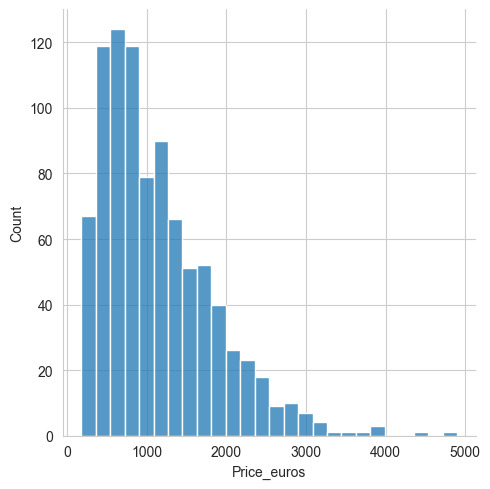

In [60]:
sns.displot(train_df['Price_euros']);

In [61]:
# Procesar la columna 'Weight' y convertirla a numérico
train_df['Weight'] = train_df['Weight'].str.replace('kg', '').astype(float)
test_df['Weight'] = test_df['Weight'].str.replace('kg', '').astype(float)

# Procesar la columna 'Ram' y convertirla a numérico
train_df['Ram'] = train_df['Ram'].str.replace('GB', '').astype(int)
test_df['Ram'] = test_df['Ram'].str.replace('GB', '').astype(int)

# Extraer la resolución de pantalla y combinarla en una sola columna 'Resolution'
train_df[['res_width', 'res_height']] = train_df['ScreenResolution'].str.extract(r'(\d{3,4})x(\d{3,4})').astype(float)
test_df[['res_width', 'res_height']] = test_df['ScreenResolution'].str.extract(r'(\d{3,4})x(\d{3,4})').astype(float)

# Combinar 'res_width' y 'res_height' en una sola columna 'Resolution'
train_df['Resolution'] = train_df['res_width'] * train_df['res_height']
test_df['Resolution'] = test_df['res_width'] * test_df['res_height']

# Eliminar las columnas 'res_width' y 'res_height' ya que se combinan en 'Resolution'
train_df = train_df.drop(columns=['res_width', 'res_height'])
test_df = test_df.drop(columns=['res_width', 'res_height'])

# Procesar la columna 'Memory' y convertirla a numérico (GB)
def parse_memory(memory_str):
    if isinstance(memory_str, str):
        memory_str = memory_str.strip().lower()
        if 'gb' in memory_str:
            return int(float(memory_str.split('gb')[0].strip()))  # Extraer el número antes de 'GB'
        elif 'tb' in memory_str:
            return int(float(memory_str.split('tb')[0].strip()) * 1024)  # Convertir TB a GB
    return 0

train_df['Memory'] = train_df['Memory'].apply(parse_memory)
test_df['Memory'] = test_df['Memory'].apply(parse_memory)

# Procesar la columna 'Cpu' y extraer información más precisa (extraigo el número de núcleos y frecuencia si están disponibles)
def parse_cpu(cpu_str):
    if isinstance(cpu_str, str):
        cpu_str = cpu_str.strip().lower()
        # Extraer el número de núcleos y la frecuencia
        cores = [int(s) for s in cpu_str.split() if s.isdigit() and 'core' in cpu_str]
        frequency = [float(s.replace('ghz', '').strip()) for s in cpu_str.split() if 'ghz' in s]
        cores = cores[0] if cores else 0
        freq = frequency[0] if frequency else 0
        return cores * 10 + freq  # Combina el número de núcleos y la frecuencia
    return 0

train_df['Cpu'] = train_df['Cpu'].apply(parse_cpu)
test_df['Cpu'] = test_df['Cpu'].apply(parse_cpu)

# Procesar la columna 'Gpu' y asignar un valor numérico basado en el modelo de GPU
def parse_gpu(gpu_str):
    if isinstance(gpu_str, str):
        gpu_str = gpu_str.strip().lower()
        # Asignamos un valor numérico basado en el modelo de GPU
        if 'nvidia' in gpu_str:
            if 'gtx' in gpu_str:
                return 2  # Representa GPUs NVIDIA GTX
            elif 'rtx' in gpu_str:
                return 3  # Representa GPUs NVIDIA RTX
            else:
                return 1  # Representa otros tipos de NVIDIA
        elif 'amd' in gpu_str:
            return 4  # Representa GPUs AMD
        else:
            return 0  # Otros tipos de GPU o sin GPU
    return 0

train_df['Gpu'] = train_df['Gpu'].apply(parse_gpu)
test_df['Gpu'] = test_df['Gpu'].apply(parse_gpu)

# Procesar la columna 'TypeName' y convertirla a variables numéricas con One-Hot Encoding
train_df = pd.get_dummies(train_df, columns=['TypeName'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['TypeName'], drop_first=True)

# Seleccionar las características que usaremos para el modelo
features_to_use_improved = ['Inches', 'Ram', 'Weight', 'Memory', 'Resolution', 'Cpu', 'Gpu'] + [col for col in train_df.columns if col.startswith('TypeName_')]

# Crear los conjuntos de entrenamiento y prueba
X_train_improved = train_df[features_to_use_improved]
X_test_improved = test_df[features_to_use_improved]

# Separar la variable objetivo (target)
y_train = train_df['Price_euros']

# Dividir los datos en conjunto de entrenamiento y validación
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_improved, y_train, test_size=0.2, random_state=42)

# Aplicar la transformación logarítmica para hacer la distribución más normal
y_train_log = np.log1p(y_train_split)
y_val_log = np.log1p(y_val_split)


In [62]:
X_train_improved.head()

,Inches,Ram,Weight,Memory,Resolution,Cpu,Gpu,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,12.5,4,1.20,64,2073600.0,0.9,0,False,False,False,False,False
1,17.3,8,3.20,256,2073600.0,3.2,4,True,False,False,False,False
2,15.6,4,1.85,1024,2073600.0,2.7,0,False,False,True,False,False
3,13.3,16,1.29,512,5760000.0,2.5,0,False,False,False,True,False
4,15.6,4,2.32,1024,2073600.0,2.5,0,False,False,True,False,False


In [63]:
# Definir el modelo XGBoost
xgb_model = XGBRegressor(random_state=42, n_jobs=-1, eval_metric='logloss')

# Definir el espacio de búsqueda de los hiperparámetros (reducido para mayor velocidad)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Crear el GridSearchCV con validación cruzada (menos pliegues para mayor velocidad)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_absolute_error',  # Reducir cv a 2 pliegues
                           n_jobs=-1, verbose=2)

# Ajustar el modelo con la búsqueda de hiperparámetros
grid_search.fit(X_train_split, y_train_log)

# Mostrar los mejores parámetros encontrados
best_params = grid_search.best_params_
print(f'Mejores parámetros encontrados: {best_params}')

# Predecir con el mejor modelo
best_xgb_model = grid_search.best_estimator_
y_pred_xgb_log = best_xgb_model.predict(X_val_split)

# Invertir la transformación logarítmica para obtener los valores originales
y_pred_xgb = np.expm1(y_pred_xgb_log)

# Calcular el MAE para el modelo optimizado
mae_xgb = mean_absolute_error(y_val_split, y_pred_xgb)
print(f'MAE del modelo optimizado: {mae_xgb}')



Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\mikel\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores parámetros encontrados: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 300, 'subsample': 1.0}
MAE del modelo optimizado: 183.16629594646517


In [64]:
# Predecir en el conjunto de prueba
y_pred_test_log = best_xgb_model.predict(X_test_improved)

# Invertir la transformación logarítmica para obtener los valores de precio originales
y_pred_test = np.expm1(y_pred_test_log)

# Crear un DataFrame con los resultados
output_df = test_df[['id']]
output_df['Price_euros'] = y_pred_test

# Guardar el archivo CSV de salida
output_df.to_csv('laptop_price_predictions.csv', index=False)
print('Archivo de predicciones guardado como laptop_price_predictions.csv')


Archivo de predicciones guardado como laptop_price_predictions.csv


C:\Users\mikel\AppData\Local\Temp\ipykernel_22160\2811501838.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_df['Price_euros'] = y_pred_test
